In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

import joblib


In [21]:
df = pd.read_csv("C:/Users/reddy/Downloads/archive/Crop_recommendation.csv")
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [22]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

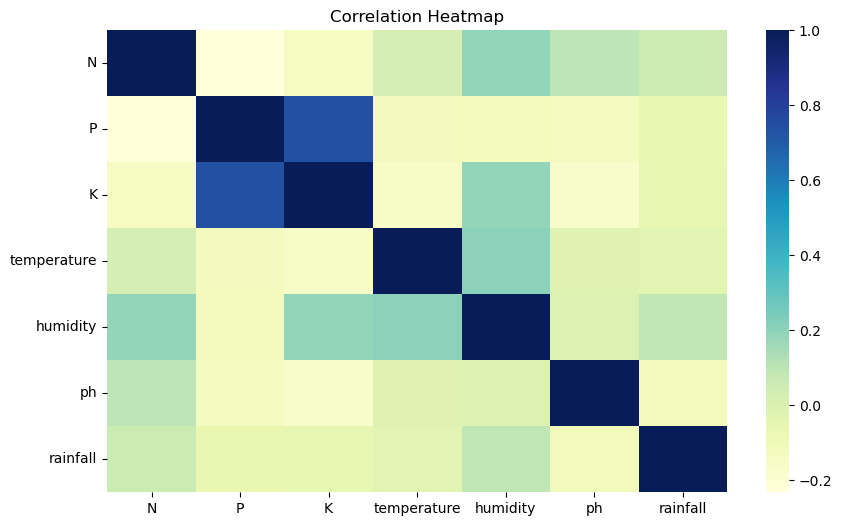

In [24]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), cmap="YlGnBu", annot=False)
plt.title("Correlation Heatmap")
plt.show()



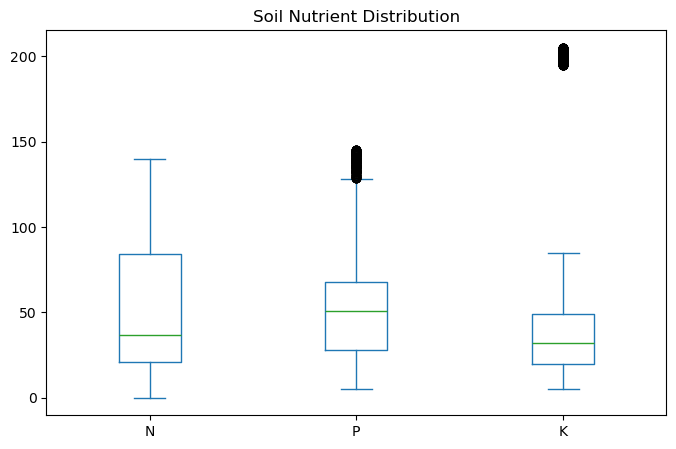

In [25]:
df[['N','P','K']].plot(kind='box', figsize=(8,5))
plt.title("Soil Nutrient Distribution")
plt.show()


In [26]:
df['N_P_ratio'] = df['N'] / (df['P'] + 1)
df['K_N_ratio'] = df['K'] / (df['N'] + 1)
df['climate_index'] = (df['temperature'] + df['humidity']) / 2


In [27]:
X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [28]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.990909090909091


In [29]:
et = ExtraTreesClassifier(n_estimators=300, random_state=42)
et.fit(X_train, y_train)
et_pred = et.predict(X_test)
print("Extra Trees Accuracy:", accuracy_score(y_test, et_pred))


Extra Trees Accuracy: 0.9840909090909091


In [30]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))


Gradient Boosting Accuracy: 0.9772727272727273


In [31]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))


SVM Accuracy: 0.9636363636363636


In [32]:
scores = {
    "Random Forest": accuracy_score(y_test, rf_pred),
    "Extra Trees": accuracy_score(y_test, et_pred),
    "Gradient Boosting": accuracy_score(y_test, gb_pred),
    "SVM": accuracy_score(y_test, svm_pred)
}

scores


{'Random Forest': 0.990909090909091,
 'Extra Trees': 0.9840909090909091,
 'Gradient Boosting': 0.9772727272727273,
 'SVM': 0.9636363636363636}

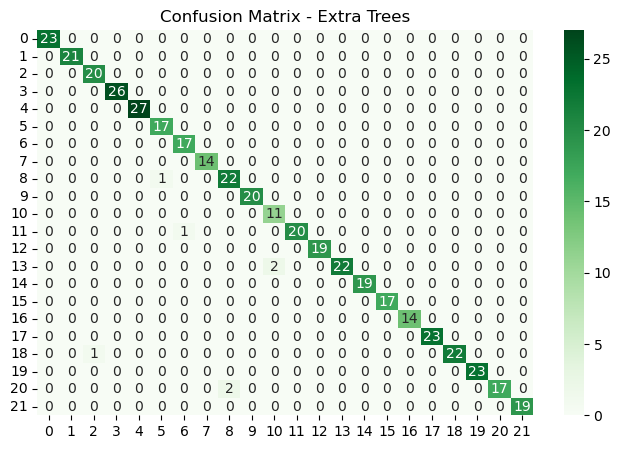

In [33]:
cm = confusion_matrix(y_test, et_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix - Extra Trees")
plt.show()


In [34]:
print(classification_report(y_test, et_pred))


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

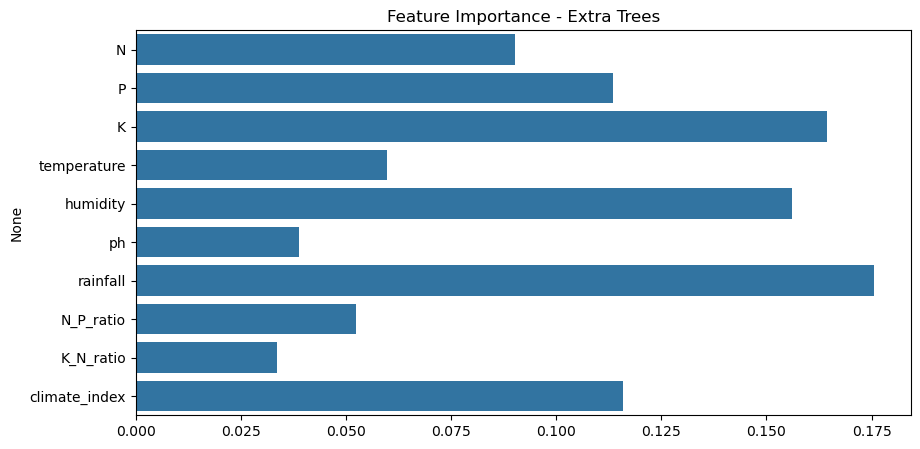

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(x=et.feature_importances_, y=X.columns)
plt.title("Feature Importance - Extra Trees")
plt.show()


In [36]:
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    N_P_ratio = N / (P + 1)
    K_N_ratio = K / (N + 1)
    climate_index = (temperature + humidity) / 2
    
    sample = pd.DataFrame([[
        N, P, K, temperature, humidity, ph, rainfall,
        N_P_ratio, K_N_ratio, climate_index
    ]], columns=X.columns)
    
    result = et.predict(sample)
    return result[0]


In [37]:
predict_crop(90, 40, 40, 20, 80, 6.5, 200)


'rice'

In [38]:
joblib.dump(et, "crop_model.pkl")


['crop_model.pkl']

In [39]:
model = joblib.load("crop_model.pkl")


In [40]:
import joblib
joblib.dump(et, "crop_model.pkl")


['crop_model.pkl']